## K-means

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
data= pd.read_csv('mall_customers.csv')

data= data.drop("CustomerID", axis = 1)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:

from sklearn.preprocessing import OneHotEncoder


# One-hot encode the categorical column
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['Gender']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical column
data_encoded.drop(['Gender'], axis=1, inplace=True)

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the encoded data
kmeans.fit(data_encoded)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(data)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      Male   19                  15                      39        0
1      Male   21                  15                      81        0
2    Female   20                  16                       6        0
3    Female   23                  16                      77        0
4    Female   31                  17                      40        0
..      ...  ...                 ...                     ...      ...
195  Female   35                 120                      79        1
196  Female   45                 126                      28        2
197    Male   32                 126                      74        1
198    Male   32                 137                      18        2
199    Male   30                 137                      83        1

[200 rows x 5 columns]


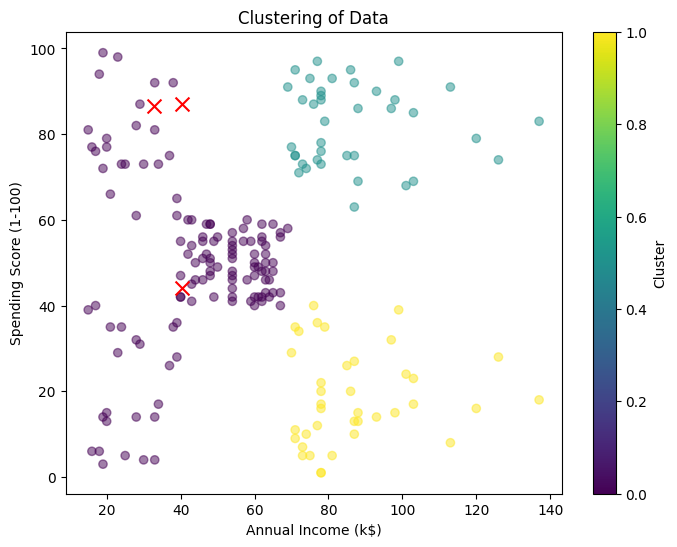

In [14]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with cluster labels

# Plot the clusters
plt.figure(figsize=(8, 6))

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Data')
plt.colorbar(label='Cluster')

plt.show()


In [15]:
centroids = kmeans.cluster_centers_
centroids

array([[40.32520325, 44.15447154, 49.82926829,  0.59349593,  0.40650407],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579]])

In [16]:
cluster_statistics = data.groupby('Cluster').describe()

# Print the statistics
print(cluster_statistics)

           Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Cluster                                                              
0        123.0  40.325203  16.113580  18.0  24.5  38.0  51.5  70.0   
1         39.0  32.692308   3.728650  27.0  30.0  32.0  35.5  40.0   
2         38.0  40.394737  11.376931  19.0  34.0  41.5  47.0  59.0   

        Annual Income (k$)             ...               \
                     count       mean  ...   75%    max   
Cluster                                ...                
0                    123.0  44.154472  ...  59.5   69.0   
1                     39.0  86.538462  ...  95.0  137.0   
2                     38.0  87.000000  ...  96.0  137.0   

        Spending Score (1-100)                                           \
                         count       mean        std   min    25%   50%   
Cluster                                                                   

* Qué pasa si cambio el Hyper-parámetro k?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

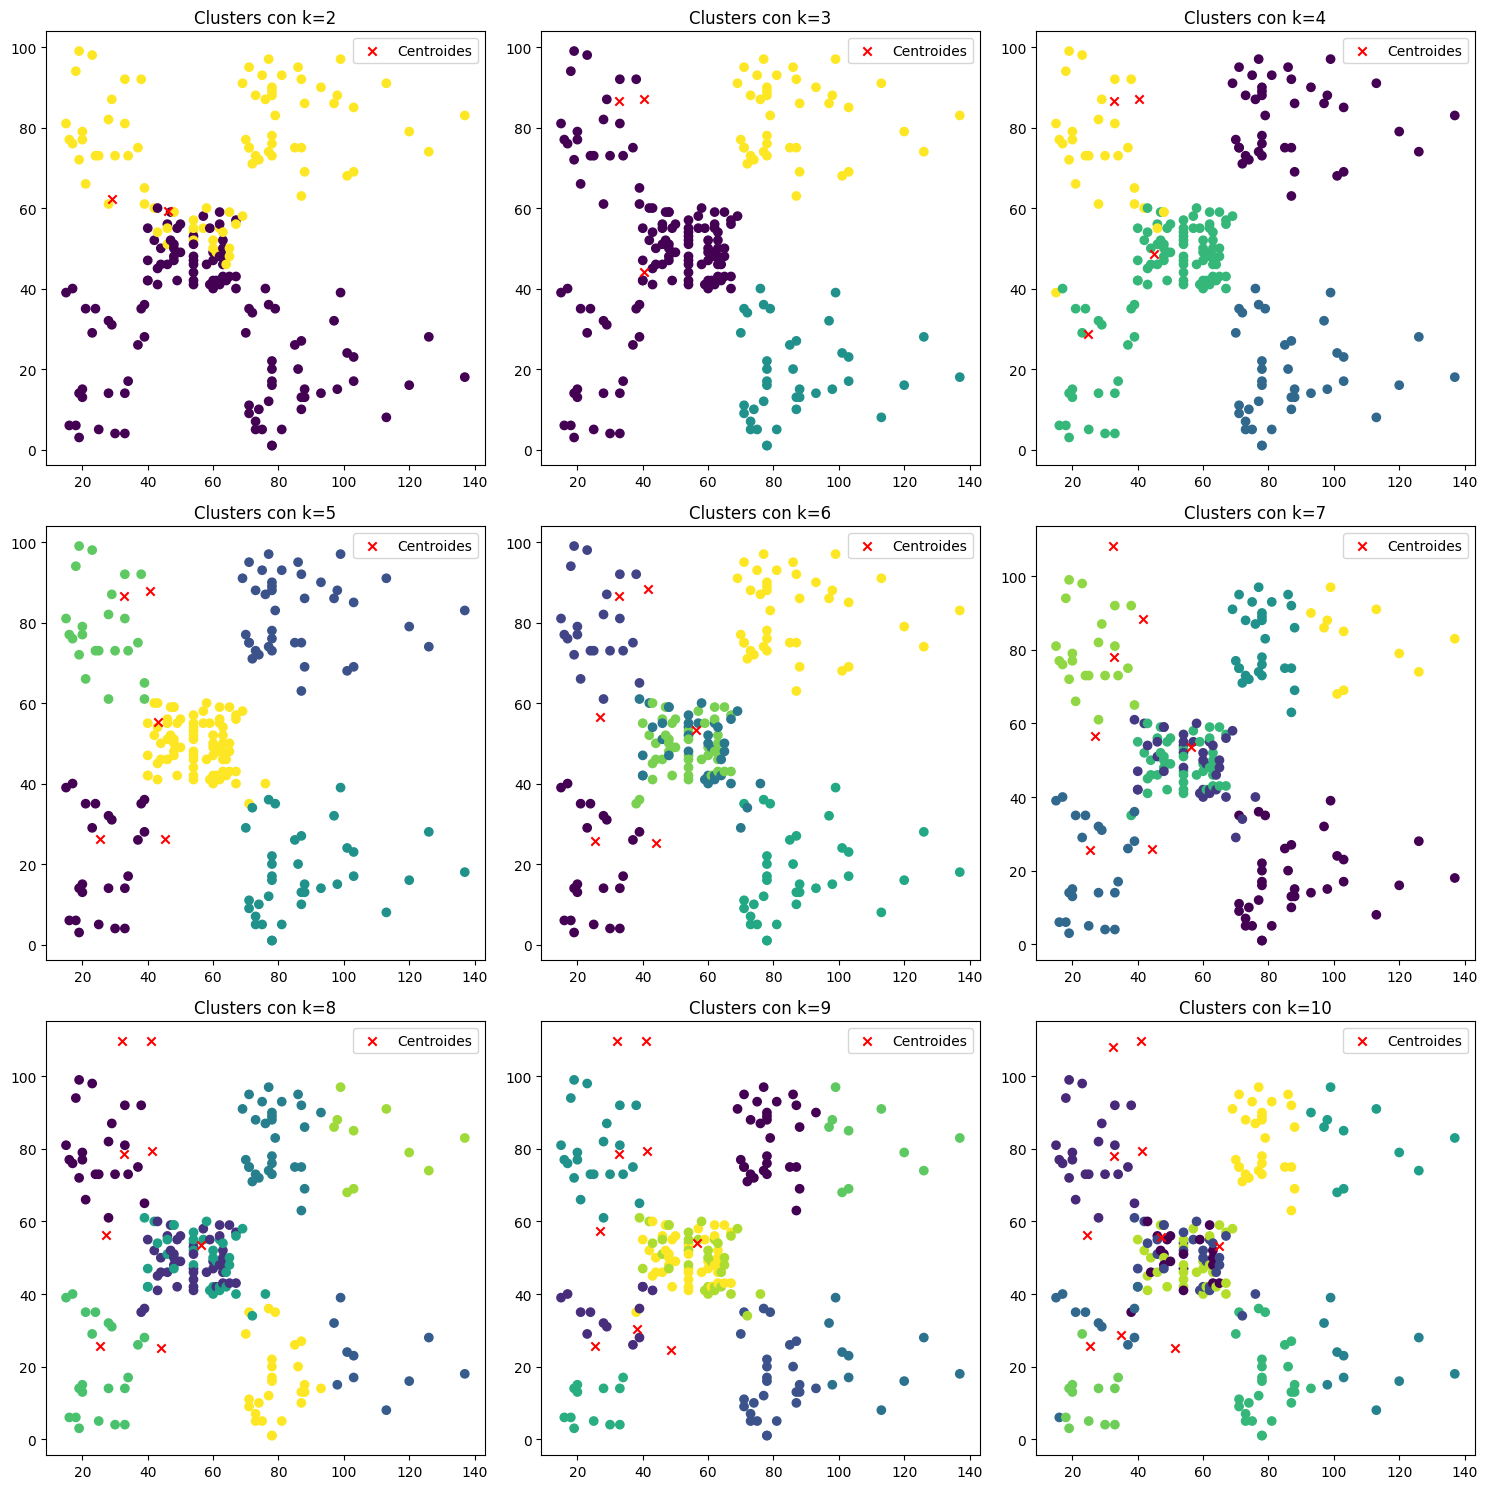

In [20]:
# Definir el rango de valores de k a evaluar
k_values = range(2, 11)

# Create subplots to display each clustering result
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, k in enumerate(k_values):
    # Crear el algoritmo de KMeans
    kmeans = KMeans(n_clusters=k)

    # Ajusta el modelo
    kmeans.fit(data_encoded)

    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Visualizar
    axs[i].scatter(data_encoded['Annual Income (k$)'], data_encoded['Spending Score (1-100)'], c=cluster_labels)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label="Centroides")
    axs[i].set_title(f"Clusters con k={k}")
    axs[i].legend()

plt.tight_layout()
plt.show()



* Cuál es el k óptimo?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[Text(0.5, 1.0, 'Buscando a K')]

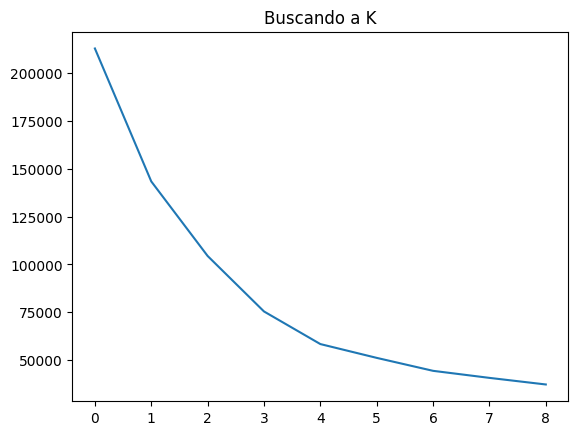

In [21]:
# Definir el rango de valores de k a evaluar
k_values = range(2, 11)

lista_errores = []
for k in k_values:
    # Crear el algoritmo de KMeans
    kmeans = KMeans(n_clusters=k)

    #Ajusta el modelo
    kmeans.fit(data_encoded)

    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # error cuadrático total
    lista_errores.append(kmeans.inertia_)


sns.lineplot(data=lista_errores).set(title="Buscando a K")

In [22]:
optimo_k = k_values[np.argmax(lista_errores)]
print(f"El número óptimo de clusters es: {optimo_k+1}")

El número óptimo de clusters es: 3


In [24]:
# error cuadrático total
lista_errores

[212938.71508951404,
 143440.43314900764,
 104463.19922884133,
 75448.45165554191,
 58398.902680652696,
 51178.83719460617,
 44404.73719460616,
 40721.28668400565,
 37270.90815554178]

In [25]:
centroids

array([[ 42.63636364, 108.18181818,  21.27272727,   0.63636364,
          0.36363636],
       [ 24.82758621,  56.86206897,  51.        ,   0.5862069 ,
          0.4137931 ],
       [ 36.30769231,  31.69230769,  36.46153846,   0.69230769,
          0.30769231],
       [ 32.78571429,  78.03571429,  81.89285714,   0.53571429,
          0.46428571],
       [ 49.        ,  24.46153846,  11.07692308,   0.53846154,
          0.46153846],
       [ 25.27272727,  25.72727273,  79.36363636,   0.59090909,
          0.40909091],
       [ 46.5       ,  61.625     ,  46.        ,   0.66666667,
          0.33333333],
       [ 39.36363636,  79.13636364,  13.36363636,   0.36363636,
          0.63636364],
       [ 61.44444444,  51.18518519,  50.44444444,   0.51851852,
          0.48148148],
       [ 32.45454545, 108.18181818,  82.72727273,   0.54545455,
          0.45454545]])

In [26]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

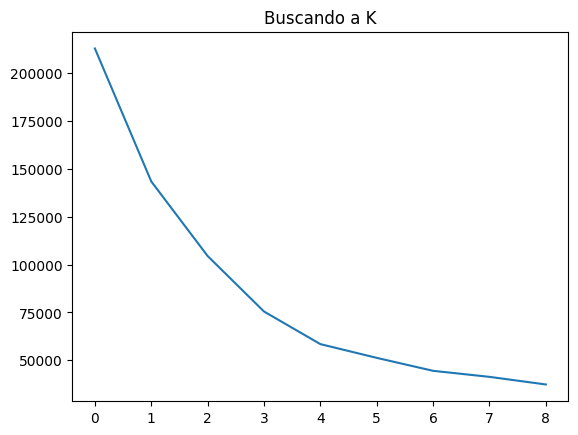

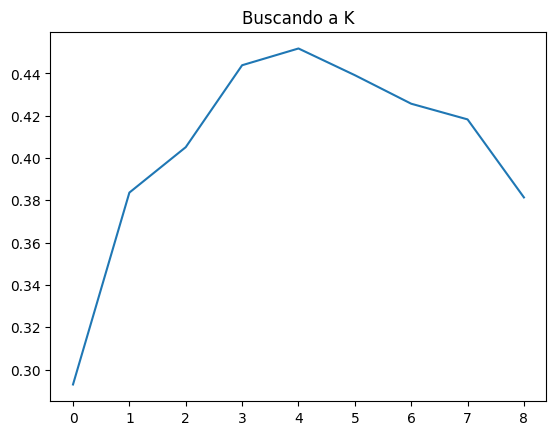

In [29]:
# Definir el rango de valores de k a evaluar
k_values = range(2, 11)

lista_errores = []
lista_silueta = []
for k in k_values:
    # Crear el algoritmo de KMeans
    kmeans = KMeans(n_clusters=k)

    #Ajusta el modelo
    kmeans.fit(data_encoded)

    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # error cuadrático total
    lista_errores.append(kmeans.inertia_)
    lista_silueta.append(silhouette_score(data_encoded,cluster_labels))


sns.lineplot(data=lista_errores).set(title="Buscando a K")
plt.show()
sns.lineplot(data=lista_silueta).set(title="Buscando a K")
plt.show()

k=4 es optimum segun elbow graph y silhouette score.
